# POST request demonstration for all endpoints of hrafapi

In [2]:
!pip install igraph



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.8 MB/s eta 0:00:00a 0:00:01


In [3]:
import requests
import glob
#from sklearn import utils
from collections import namedtuple, defaultdict
import logging
#from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import os
from pathlib import Path
from numpy import random

import spacy
import nltk
import matplotlib.pyplot as plt
import re
import warnings
import pickle
warnings.simplefilter('ignore')
pd.set_option('max_colwidth',1000)
#!pip3 install pickle5
import pickle5 as pickle

import os, json

import hypernetx as hnx
from hnxwidget import HypernetxWidget 
from pandas import DataFrame
import networkx as nx
from networkx.drawing import spring_layout

from pyvis.network import Network
from IPython.display import HTML


#%matplotlib inline
#%matplotlib qt 
%matplotlib notebook
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 20000
stop_words = spacy.lang.en.stop_words.STOP_WORDS

from sklearn.decomposition import PCA
# info = api.info()  # show info about available models/datasets


#### Endpoint 1 - OCM Suggest

In [4]:
url = 'https://iklews.hraf.net/hrafapi1/ocmsuggest'
text="Most women don’t begin perimenopause until their 40s, but some studies have found that Black women tend to start the transition earlier than people of other races. Ms. Fogle, who is Black, started experiencing night sweats for the first time too, another clue that her hormones were changing. So she visited the gynecologist, looking for answers, reassurance and maybe something to help with the sweats, which were beginning to disrupt her sleep. “When I said to him, ‘I think I’m starting menopause,’ he laughed out loud as if it was the most ridiculous thing he had ever heard,” Ms. Fogle said. “Not only that, he literally called his nurse in and said, ‘Can you believe this woman?’ Like I wasn’t even in the room.” She was so turned off by that interaction that she decided she was better off just “muddling through” without medical help, she said. Perimenopause lasts four to 10 years on average. For Ms. Fogle, it lasted over 15 years — she reached menopause (defined as not having periods for 12 consecutive months) when she turned 50. The transition to menopause is confounding for many of the one million American women who, annually, contend with dozens of symptoms — including hot flashes; vaginal dryness; hair loss; irregular, heavy periods; and weight gain — with little medical guidance and few options for relief. Your Questions About Menopause, Answered Card 1 of 7 What are perimenopause and menopause? Perimenopause is the final years of a woman’s reproductive years that leads up to menopause, the end of a woman’s menstrual cycle. Menopause begins one year after a woman’s final menstrual period. What are the symptoms of menopause? The symptoms of menopause can begin during perimenopause and continue for years. Among the most common are hot flashes, depression, genital and urinary symptoms, brain fog, and skin and hair issues. How can I find some relief from these symptoms? A low-dose birth control pill can control bleeding issues and ease night sweats during perimenopause. Avoiding alcohol and caffeine can reduce hot flashes, while cognitive behavioral therapy and meditation can make them more tolerable. Menopausal hormone therapy and the selective serotonin reuptake inhibitor paroxetine can also ease some symptoms. What is Veozah? Veozah is the first nonhormonal medication to treat hot flashes in menopausal women; it was recently approved by the F.D.A. The drug targets a neuron in the brain that becomes unbalanced as estrogen levels fall. It might be particularly helpful for women over 60 because, at that age, starting hormonal treatments can be considered risky."
params = {'text': text}
ocms = requests.post(url, data = params)
print(ocms.text)

{"LDA_NER_Topic_Label":{"0":"menopause women woman men children_org cardinal time person date","1":"heart rasa organs pak brain term napsus dwidjo may_cardinal","2":"herbalists religious men therapies therapy herbalist disease herbal therapist_cardinal","3":"menopause sheep women herding woman girl yet_time cardinal date","4":"wife women woman children family son husband sons father_cardinal","5":"would normal units urinary excretion values patterns_cardinal time quantity","6":"citrus food examinations diet fried acceptable excretion urinary rich deficient_","7":"though classification system may cold herbs foods hot body_cardinal","8":"medical doctor illness doctors patients treatment cases medicines medicine_cardinal","9":"throat leaves infusion sore medicine dance used patient also_cardinal","10":"paranoid fear menopause may reached personality yet schizophrenia patient_cardinal","11":"eating malaria substance serum excretion normal units_quantity time percent","12":"poison witchcraf

In [5]:
Dimensions_df = pd.read_json(ocms.text)
display(Dimensions_df.round(2))

LDA_NER_Topic_Label  \
0                         menopause women woman men children_org cardinal time person date   
1                              heart rasa organs pak brain term napsus dwidjo may_cardinal   
2   herbalists religious men therapies therapy herbalist disease herbal therapist_cardinal   
3                          menopause sheep women herding woman girl yet_time cardinal date   
4                        wife women woman children family son husband sons father_cardinal   
5              would normal units urinary excretion values patterns_cardinal time quantity   
6         citrus food examinations diet fried acceptable excretion urinary rich deficient_   
7                      though classification system may cold herbs foods hot body_cardinal   
8      medical doctor illness doctors patients treatment cases medicines medicine_cardinal   
9                    throat leaves infusion sore medicine dance used patient also_cardinal   
10      paranoid fear menopause may reached personality yet schizophrenia patient_cardinal   
11             eating malaria substance serum excretion normal units_quantity time percent   
12                poison witchcraft dead belly oracle said substance death_person cardinal   
13                       ghosts ancestors dead soul like word spirits_person cardinal date   
14                           thought status may fear well social also_cardinal person date   
15                            treaty boys members would may_loc cardinal time ordinal date   
16            addict children social drugs women drug neighborhood addicts_cardinal person   
17                 women men girl sexual menstruation girls marriage_ordinal cardinal date   
18                       hospital child doctor would home husband illness mother_time date   

    OCM                OCM_Description  Rank  Topic_Prob(%)  
0   886                     SENESCENCE     1          19.87  
1   827                ETHNOPHYSIOLOGY     2          15.02  
2   759              MEDICAL PERSONNEL     3          14.43  
3   886                     SENESCENCE     1          10.52  
4   886                     SENESCENCE     1           9.26  
5   143                       GENETICS     4           7.88  
6   146                      NUTRITION     6           2.86  
7   820  IDEAS ABOUT NATURE AND PEOPLE     7           2.08  
8   757                MEDICAL THERAPY     8           1.87  
9   278                PHARMACEUTICALS     9           1.86  
10  158          PERSONALITY DISORDERS     5           1.84  
11  164                      MORBIDITY    10           1.82  
12  763                          DYING    11           1.50  
13  775                    ESCHATOLOGY    12           1.48  
14  158          PERSONALITY DISORDERS     5           1.44  
15  573                        CLIQUES    13           1.40  
16  733  ALCOHOLISM AND DRUG ADDICTION    14           1.33  
17  841                   MENSTRUATION    15           1.29  
18  758                   MEDICAL CARE    16           1.25

#### Endpoint 2 - 3D PCA

In [15]:
url = 'https://iklews.hraf.net/hrafapi1/3d_pca'
word='kinship'
params = {'word': word}
pca = requests.post(url, data = params)
print(pca.text)

{"PCA1":{"0":-0.07300130277872086,"1":-5.290188789367676,"2":1.7386150360107422,"3":6.980706214904785,"4":-0.27367591857910156,"5":-1.5038554668426514,"6":6.73098611831665,"7":-6.327742576599121,"8":1.376599669456482,"9":9.986212730407715,"10":-5.559537887573242,"11":-6.959057331085205,"12":-1.6122326850891113,"13":7.741159439086914,"14":-6.258851528167725,"15":-0.696133553981781},"PCA2":{"0":0.7543938755989075,"1":-4.011192798614502,"2":10.727851867675781,"3":-4.533790588378906,"4":-3.20542311668396,"5":-0.4048762619495392,"6":-1.396459698677063,"7":-6.390539169311523,"8":10.247625350952148,"9":-1.2058357000350952,"10":-0.24956589937210083,"11":7.36482572555542,"12":-1.6953471899032593,"13":-3.658909797668457,"14":-5.585034370422363,"15":3.242280960083008},"PCA3":{"0":-1.315659999847412,"1":3.660963773727417,"2":-2.9082541465759277,"3":-3.197756290435791,"4":-1.3025798797607422,"5":0.6714906692504883,"6":-3.18656325340271,"7":2.3674426078796387,"8":-1.1614367961883545,"9":5.8163046836

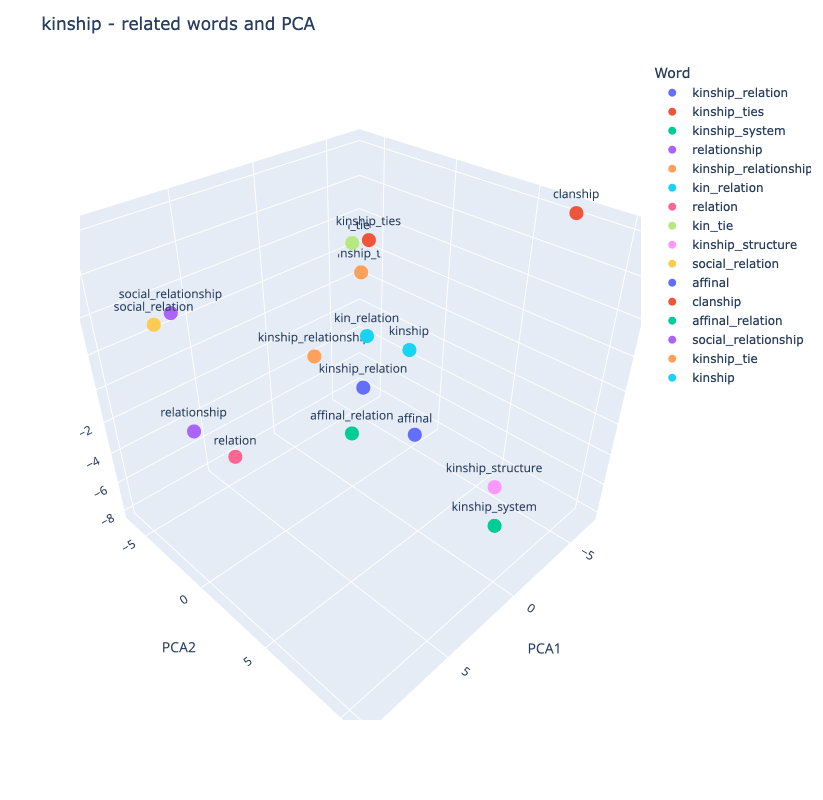

In [16]:
df = pd.read_json(pca.text)
import plotly.express as px
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3',
              color='Word', text="Word", size_max=60)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text=word+" "+'- related words and PCA'
)

fig.show()
#fig.write_html(word+" "+"api"+"_PCA.html")

#### Endpoint 3 - Ethnoword PCA (PCA Hypergraph)

PCA based word dimensions
https://iklews.hraf.net/hrafapi1/ethnoword/pca?word=marriage
Word Dimensions
The endpoint takes 3 parameters - word, topnumber and threshold. Threshold has a default value of 0.6 and topnumber has a default value of 10 . It can be changed if needed.

https://iklews.hraf.net/hrafapi1/ethnoword/pca?word=marriage
https://iklews.hraf.net/hrafapi1/ethnoword/pca?word=marriage&threshold=0.6&topnumber=20
https://iklews.hraf.net/hrafapi1/ethnoword/pca?word=marriage&threshold=0.8
https://iklews.hraf.net/hrafapi1/ethnoword/pca?word=marriage&topnumber=20

In [13]:
url = 'https://iklews.hraf.net/hrafapi1/ethnoword/pca'
word='kinship'
params = {'word': word}
WordDimen = requests.post(url, data = params)
print(WordDimen.text)

{"0":{"Max":"social_structure","Min":"consanguinity","NegScore":0.8151419162750244,"NegWord":"blood_relationship","PosScore":0.8544222116470337,"PosWord":"social_organization"},"1":{"Max":"relationship","Min":"cognatic","NegScore":0.7555789351463318,"NegWord":"bilateral","PosScore":0.8341395854949951,"PosWord":"relation"},"2":{"Max":"clanship","Min":"siblingship","NegScore":0.7098369598388672,"NegWord":"kinship_relationship","PosScore":0.696201741695404,"PosWord":"kinship_ties"},"3":{"Max":"siblingship","Min":"affinity","NegScore":0.697406530380249,"NegWord":"connection","PosScore":0.7288552522659302,"PosWord":"kin_relation"},"4":{"Max":"consanguinity","Min":"kin_relationship","NegScore":0.8097028732299805,"NegWord":"kinship_relation","PosScore":0.721293568611145,"PosWord":"affinity"},"5":{"Max":"siblingship","Min":"cognatic_kinship","NegScore":0.7518928647041321,"NegWord":"bilateral_kinship","PosScore":0.710629940032959,"PosWord":"kinship_relationship"},"6":{"Max":"affinal","Min":"cog

In [14]:
Dimensions_df = pd.read_json(WordDimen.text).transpose()
display(Dimensions_df.round(2))
for index, row in Dimensions_df.iterrows():
    print(word," |> ",row[0],"∆",row[1]," = ", row[3]," (",round(row[2],3),")")
    print(word," |> ",row[1],"∆",row[0]," = ", row[5]," (",round(row[4],3),")")


Max                   Min  NegScore               NegWord  \
0  social_structure         consanguinity  0.815142    blood_relationship   
1      relationship              cognatic  0.755579             bilateral   
2          clanship           siblingship  0.709837  kinship_relationship   
3       siblingship              affinity  0.697407            connection   
4     consanguinity      kin_relationship  0.809703      kinship_relation   
5       siblingship      cognatic_kinship  0.751893     bilateral_kinship   
6           affinal      cognatic_kinship  0.708068   social_organization   
7       affiliation         consanguinity   0.65531              affinity   
8      relationship  kinship_organization  0.753275   social_organization   
9          affinity  kinship_relationship  0.806044      kinship_relation   

   PosScore               PosWord  
0  0.854422   social_organization  
1   0.83414              relation  
2  0.696202          kinship_ties  
3  0.728855          kin_relation  
4  0.721294              affinity  
5   0.71063  kinship_relationship  
6  0.820232                affine  
7  0.752203      group_membership  
8  0.815027              relation  
9  0.669076         consanguinity

kinship  |>  social_structure ∆ consanguinity  =  blood_relationship  ( 0.815 )
kinship  |>  consanguinity ∆ social_structure  =  social_organization  ( 0.854 )
kinship  |>  relationship ∆ cognatic  =  bilateral  ( 0.756 )
kinship  |>  cognatic ∆ relationship  =  relation  ( 0.834 )
kinship  |>  clanship ∆ siblingship  =  kinship_relationship  ( 0.71 )
kinship  |>  siblingship ∆ clanship  =  kinship_ties  ( 0.696 )
kinship  |>  siblingship ∆ affinity  =  connection  ( 0.697 )
kinship  |>  affinity ∆ siblingship  =  kin_relation  ( 0.729 )
kinship  |>  consanguinity ∆ kin_relationship  =  kinship_relation  ( 0.81 )
kinship  |>  kin_relationship ∆ consanguinity  =  affinity  ( 0.721 )
kinship  |>  siblingship ∆ cognatic_kinship  =  bilateral_kinship  ( 0.752 )
kinship  |>  cognatic_kinship ∆ siblingship  =  kinship_relationship  ( 0.711 )
kinship  |>  affinal ∆ cognatic_kinship  =  social_organization  ( 0.708 )
kinship  |>  cognatic_kinship ∆ affinal  =  affine  ( 0.82 )
kinship  |>  af

#### Endpoint 4 - Hypergraph

In [11]:
url = 'https://iklews.hraf.net/hrafapi1/hypergraph'

#Accepts two parameters : word, and threshold. Threshold has a default value of 0.65

word='deference'
#threshold = 0.7
params = {'word': word}
#params = {'word': word, 'threshold':threshold}
hyp = requests.post(url, data = params)
print(hyp.text)

"Hypergraph({0: Entity(0,['obedience', 'social_superior', 'esteem', 'dignity', 'deference', 'great_respect', 'regard', 'respect_due', 'respectful', 'proper_respect'],{'weight': 1.0}), 1: Entity(1,['respect', 'deep_respect', 'deference', 'greatest_respect', 'great_respect'],{'weight': 1.0}), 2: Entity(2,['polite', 'etiquette', 'courteous', 'decorum', 'good_manner', 'modesty', 'friendliness', 'deference', 'civility', 'propriety'],{'weight': 1.0}), 3: Entity(3,['respect', 'deference'],{'weight': 1.0}), 4: Entity(4,['deference'],{'weight': 1.0}), 5: Entity(5,['submission', 'filial_piety', 'obedient', 'respect', 'subservience', 'compliance', 'discipline', 'absolute_obedience', 'deference', 'obey'],{'weight': 1.0}), 6: Entity(6,['deference'],{'weight': 1.0}), 7: Entity(7,['show_respect', 'polite', 'respectful_toward', 'courteous', 'respect', 'attentive', 'deferential', 'deference', 'affectionate', 'submissive'],{'weight': 1.0}), 8: Entity(8,['deference'],{'weight': 1.0}), 9: Entity(9,['an_at

In [12]:

scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP'),
}

H = hnx.Hypergraph(scenes)
HypernetxWidget(H)




# HypernetxWidget(hnx.Hypergraph(hyp))

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'CN'}, {'uid': 'CC'}, {'uid': 'BM'}, {'u…

#### Endpoint 4 - Wordsnetwork

In [21]:
url = 'https://iklews.hraf.net/hrafapi1/wordsnetwork'

#Accepts two parameters : word, and threshold
word='kinship'
threshold = 0.6
params = {'word': word, 'threshold':threshold}
network = requests.post(url, data = params)
#print(network.text)

In [22]:
import networkx as nx
cdn_resources='in_line'
finresult = pd.read_json(network.text)

G = nx.Graph()
G = nx.from_pandas_edgelist(finresult, edge_attr=True)

from matplotlib.pyplot import figure
nt = Network('800px', '1000px',notebook=True,heading=word+" "+"API"+"_Word Network")
# populates the nodes and edges data structures
nt.from_nx(G)

#nt.show_buttons(filter_=['physics'])
outfile =word+" "+"API"+'_wordsnetwork'+'_'+str(threshold)+'threshold.html'
nt.show(outfile)

kinship API_wordsnetwork_0.6threshold.html


#### Endpoint 5 - Average of Similar words

In [17]:
#Post method returns json output. Accepts list of positive words and negative words. Also accepts null values for a field.

from pprint import pprint

url = 'https://iklews.hraf.net/hrafapi1/wordDimensions/averageOfSimilarWords'

#Accepts two parameters : pos and neg
pos=['queen','man']
neg=['woman']
params = {'positive': pos, 'negative':neg}
x = requests.post(url, data = params)
pprint(x.text)

('{"Average of similar words (Iteration '
 '2)":{"0":["viceroy",0.7494927644729614],"1":["queen",0.7319208979606628],"2":["emperor",0.7198940515518188],"3":["earl",0.7193343639373779],"4":["ambassador",0.7085994482040405],"5":["governor",0.7037840485572815],"6":["archbishop",0.6910303235054016],"7":["crown_prince",0.6879705190658569],"8":["admiral",0.6874262094497681],"9":["her_majesty",0.6796784400939941]},"Similar '
 'words (Iteration '
 '1)":{"0":["duke",0.6276688575744629],"1":["queen_victoria",0.6036521196365356],"2":["king_george",0.595901608467102],"3":["chancellor",0.594476580619812],"4":["queen_elizabeth",0.5856836438179016],"5":["coronation",0.5772725939750671],"6":["marquis",0.5690547823905945],"7":["his_majesty",0.5653274059295654],"8":["charles_ii",0.5640832781791687],"9":["whitehall",0.5613031387329102]}}\n')


In [18]:
#Post method returns json output. Accepts list of positive words and negative words. Also accepts null values for a field.

url = 'https://iklews.hraf.net/hrafapi1/wordDimensions/averageOfSimilarWords'

#Accepts two parameters : pos and neg
pos=['love']
#neg=[]
params = {'positive': pos}
x = requests.post(url, data = params)
print(x.text)

{"Average of similar words (Iteration 2)":{"0":["love",0.9431384801864624],"1":["joy",0.7479522824287415],"2":["sorrow",0.7346401214599609],"3":["jealous",0.7259166240692139],"4":["delight",0.7256585359573364],"5":["their_heart",0.713778555393219],"6":["unhappy",0.7136862874031067],"7":["happiness",0.7094738483428955],"8":["wish",0.7083972692489624],"9":["so_much",0.7083942890167236]},"Similar words (Iteration 1)":{"0":["affection",0.8216670751571655],"1":["he_love",0.7792292237281799],"2":["she_love",0.7667328715324402],"3":["compassion",0.7474866509437561],"4":["pity",0.7458741664886475],"5":["hate",0.7247110605239868],"6":["lover",0.7106378674507141],"7":["passion",0.7104718089103699],"8":["pleasure",0.7016432285308838],"9":["happy",0.6946330666542053]}}



#### Endpoint 6 - Subtopics

In [42]:
#Post method returns json output. Accepts list of positive words and negative words. Also accepts null values for a field.

url = 'https://iklews.hraf.net/hrafapi1/subtopics'

#Accepts two parameters : text and ocm
text="The infant was an exceptionally large male child in a good state of nutrition. [WPM: see category 142 for detailed description of this child] The weight, 12 1/4 1bs. (5.556 kilos.), and the height, 25 inches (63.5 cm.), indicate the unusual size. This is of exceptional interest, owing to the difficulty experienced in delivery. With expert attention in an upto-date hospital, the child died. In the country, at a distance from early medical attention, a result fatal to the mother might have occurred. In a savage state the death of the mother would have been almost inevitable. In the absence of any skilled obstetrical attention whatsoever over a period of many thousands of years, one would have expected that natural selection in our aborigines would have eliminated almost entirely the occurrence of infants of such a size as to render their delivery difficult or impossible. It seems hardly likely that the civilised conditions in which this woman was living could account for the unusual size of the baby."
ocm = 802
params = {'text': text, 'ocm':ocm}
x = requests.post(url, data = params)
print(x.text)

{"LDANERTopicLabel_NERText":{"0":"one reindeer used number means sa_ordinal quantity cardinal date","1":"one reindeer used number means sa_ordinal quantity cardinal date","2":"pa man number dic counting also_norp ordinal cardinal date","3":"pa man number dic counting also_norp ordinal cardinal date","4":"nee wee decimal elites murra state administered local_cardinal date","5":"nee wee decimal elites murra state administered local_cardinal date","6":"one may used word numerals many characters_cardinal time date","7":"one may used word numerals many characters_cardinal time date","8":"busk cow one used counting_cardinal time date person norp","9":"busk cow one used counting_cardinal time date person norp","10":"numbers count one system number counting_norp org cardinal date","11":"numbers count one system number counting_norp org cardinal date","12":"water co father man stick beer nicobarese says_ordinal cardinal","13":"water co father man stick beer nicobarese says_ordinal cardinal","14

#### Endpoint 7 - Combination

In [43]:
url = 'https://iklews.hraf.net/hrafapi1/combination'

#Accepts parameters : word, topnumber(default 10), threshold(default 0.6) . topnumber and threshold are optional parameters. 
word="deference"
params = {'word': word}
comb = requests.post(url, data = params)
print(comb.text)

[[{"Dimension Index":0,"Dimension Representative Word (Average Vector Word)":["respect",0.949],"Dimension Words":["deference","obedience","great_respect","regard","respect_due","dignity","esteem","proper_respect","social_superior","respectful"]},{"Dimension Index":1,"Dimension Representative Word (Average Vector Word)":["respect_due",0.822],"Dimension Words":["deference","respect","great_respect","deep_respect","greatest_respect","highest_respect","dignity","proper_respect","superior_status","obedience"]},{"Dimension Index":2,"Dimension Representative Word (Average Vector Word)":["politeness",0.903],"Dimension Words":["polite","etiquette","deference","good_manner","decorum","propriety","courteous","friendliness","civility","modesty"]},{"Dimension Index":3,"Dimension Representative Word (Average Vector Word)":["social_superior",0.819],"Dimension Words":["deference","respect","higher_status","deferential_behavior","superior","deferential","high_status","politeness"]},{"Dimension Index":4

In [44]:
Dimensions_df = pd.read_json(comb.text).transpose()
display(Dimensions_df.round(2))

0  \
0                         {'Dimension Index': 0, 'Dimension Representative Word (Average Vector Word)': ['respect', 0.9490000000000001], 'Dimension Words': ['deference', 'obedience', 'great_respect', 'regard', 'respect_due', 'dignity', 'esteem', 'proper_respect', 'social_superior', 'respectful']}   
1    {'Dimension Index': 1, 'Dimension Representative Word (Average Vector Word)': ['respect_due', 0.8220000000000001], 'Dimension Words': ['deference', 'respect', 'great_respect', 'deep_respect', 'greatest_respect', 'highest_respect', 'dignity', 'proper_respect', 'superior_status', 'obedience']}   
2                                                {'Dimension Index': 2, 'Dimension Representative Word (Average Vector Word)': ['politeness', 0.903], 'Dimension Words': ['polite', 'etiquette', 'deference', 'good_manner', 'decorum', 'propriety', 'courteous', 'friendliness', 'civility', 'modesty']}   
3                                    {'Dimension Index': 3, 'Dimension Representative Word (Average Vector Word)': ['social_superior', 0.8190000000000001], 'Dimension Words': ['deference', 'respect', 'higher_status', 'deferential_behavior', 'superior', 'deferential', 'high_status', 'politeness']}   
4                                                                                                       {'Dimension Index': 4, 'Dimension Representative Word (Average Vector Word)': ['obedience', 0.801], 'Dimension Words': ['deference', 'blind_obedience', 'respect', 'deep_respect', 'respectful']}   
..                                                                                                                                                                                                                                                                                                    ...   
105                                                                                                                                                                                                                                                                                                  None   
106                                                                                                                                                                                                                                                                                                  None   
107                                                                                                                                                                                                                                                                                                  None   
108                                                                                                                                                                                                                                                                                                  None   
109                                                                                                                                                                                                                                                                                                  None   

                                                                                                                                                                                                                                                                                                                                   1  
0                                    {'Combination Representative Word (Average Vector Word)': ['spendthrift', 0.631], 'Dimension Combination in Index': ['+0', '-1'], 'Dimension Combination words set': [['something_inherently', 0.516], ['turns_out', 0.491], ['cheap', 0.489], ['lazy_indolent', 0.482], ['speculate', 0.482]]}  
1                            

In [47]:
url = 'https://iklews.hraf.net/hrafapi1/combination'

#Accepts parameters : word, topnumber(default 10), threshold(default 0.6) . topnumber and threshold are optional parameters. 
word="deference"
topnumber = 10
threshold = 0.8
params = {'word': word, 'topnumber' : topnumber, 'threshold': threshold}
comb = requests.post(url, data = params)
print(comb.text)

[[{"Dimension Index":0,"Dimension Representative Word (Average Vector Word)":["respect",0.861],"Dimension Words":["deference"]},{"Dimension Index":1,"Dimension Representative Word (Average Vector Word)":["deference",0.861],"Dimension Words":["respect"]}],[{"Combination Representative Word (Average Vector Word)":["marseilles_where",0.519],"Dimension Combination in Index":["+0","-1"],"Dimension Combination words set":[["computerize",0.474],["ships_carrye",0.458],["southern_cambodia",0.454],["mighty_whirlwind",0.445],["hopper",0.445]]},{"Combination Representative Word (Average Vector Word)":["respect",0.939],"Dimension Combination in Index":["+1","-0"],"Dimension Combination words set":[["deference",0.861],["obedience",0.76],["great_respect",0.759],["regard",0.747],["respect_due",0.738]]}]]



In [48]:
Dimensions_df = pd.read_json(comb.text)
display(Dimensions_df.round(2))

0  \
0                                                                                                                                                                                       {'Dimension Index': 0, 'Dimension Representative Word (Average Vector Word)': ['respect', 0.861], 'Dimension Words': ['deference']}   
1  {'Combination Representative Word (Average Vector Word)': ['marseilles_where', 0.519], 'Dimension Combination in Index': ['+0', '-1'], 'Dimension Combination words set': [['computerize', 0.47400000000000003], ['ships_carrye', 0.458], ['southern_cambodia', 0.454], ['mighty_whirlwind', 0.445], ['hopper', 0.445]]}   

                                                                                                                                                                                                                                                                                                 1  
0                                                                                                                                                              {'Dimension Index': 1, 'Dimension Representative Word (Average Vector Word)': ['deference', 0.861], 'Dimension Words': ['respect']}  
1  {'Combination Representative Word (Average Vector Word)': ['respect', 0.9390000000000001], 'Dimension Combination in Index': ['+1', '-0'], 'Dimension Combination words set': [['deference', 0.861], ['obedience', 0.76], ['great_respect', 0.759], ['regard', 0.747], ['respect_due', 0.738]]}

                                                 ---- End of Document ----